## Importerer chipwhisperer, builder kode og sender til target

In [1]:
import chipwhisperer as cw
import time
import matplotlib.pylab as plt

scope = cw.scope()
target = cw.target(scope, cw.targets.SimpleSerial) #cw.targets.SimpleSerial can be omitted
scope.default_setup()
#scope.adc.samples = 50

(ChipWhisperer Other WARNING|File __init__.py:69) ChipWhisperer update available! See https://chipwhisperer.readthedocs.io/en/latest/installing.html for updating instructions


In [97]:
%%sh
cd ../hardware/victims/firmware/simpleserial-kyber512-m4/
make PLATFORM=CW308_STM32F3 CRYPTO_TARGET=NONE

SS_VER set to SS_VER_1_1
C:/Users/erlen/CHIPWH~1/cw/home/portable/avrgcc/bin/make clean_objs .dep 
make[1]: Entering directory 'C:/Users/erlen/ChipWhisperer5_64/cw/home/portable/chipwhisperer/hardware/victims/firmware/simpleserial-kyber512-m4'
SS_VER set to SS_VER_1_1
rm -f -- simpleserial-kyber512-m4-CW308_STM32F3.hex
rm -f -- simpleserial-kyber512-m4-CW308_STM32F3.eep
rm -f -- simpleserial-kyber512-m4-CW308_STM32F3.cof
rm -f -- simpleserial-kyber512-m4-CW308_STM32F3.elf
rm -f -- simpleserial-kyber512-m4-CW308_STM32F3.map
rm -f -- simpleserial-kyber512-m4-CW308_STM32F3.sym
rm -f -- simpleserial-kyber512-m4-CW308_STM32F3.lss
rm -f -- objdir-CW308_STM32F3/*.o
rm -f -- objdir-CW308_STM32F3/*.lst
rm -f -- kyber512.s indcpa.s randombytes.s fips202.s poly.s polyvec.s symmetric-fips202.s cbd.s ntt.s kem.s verify.s simpleserial.s stm32f3_hal.s stm32f3_hal_lowlevel.s stm32f3_sysmem.s
rm -f -- kyber512.d indcpa.d randombytes.d fips202.d poly.d polyvec.d symmetric-fips202.d cbd.d ntt.d kem.d ver

randombytes.c:2:2: warning: #warning Using a non-random randombytes [-Wcpp]
    2 | #warning Using a non-random randombytes
      |  ^~~~~~~


.
Compiling C: fips202.c
arm-none-eabi-gcc -c -mcpu=cortex-m4  -I. -mthumb -mfloat-abi=hard -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSS_VER=SS_VER_1_1 -DSTM32F303xC -DSTM32F3 -DSTM32 -DDEBUG -DHAL_TYPE=HAL_stm32f3 -DPLATFORM=CW308_STM32F3 -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_2_1=3 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -Os -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir-CW308_STM32F3/fips202.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto/ -std=gnu99  -MMD -MP -MF .dep/fips202.o.d fips202.c -o objdir-CW308_STM32F3/fips202.o
.
Compiling C: poly.c
arm-none-eabi-gcc -c -mcpu=cortex-m4  -I. -mthumb -mfloat-abi=hard -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSS_VER=SS_VER_1_1 -DSTM32F303xC -DSTM32F3 -DSTM32 -DDEBUG -DHAL_TYPE=HAL_stm32f3 -DPLATFORM=CW308_STM32F3 -DF_CPU=7372800UL -DSS_VER_2_0=2 -DS

.
Assembling: reduce.S
arm-none-eabi-gcc -c -mcpu=cortex-m4  -I. -x assembler-with-cpp -mthumb -mfloat-abi=hard -fmessage-length=0 -ffunction-sections -DF_CPU=7372800 -Wa,-gstabs,-adhlns=objdir-CW308_STM32F3/reduce.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto/ reduce.S -o objdir-CW308_STM32F3/reduce.o
.
Assembling: fastaddsub.S
arm-none-eabi-gcc -c -mcpu=cortex-m4  -I. -x assembler-with-cpp -mthumb -mfloat-abi=hard -fmessage-length=0 -ffunction-sections -DF_CPU=7372800 -Wa,-gstabs,-adhlns=objdir-CW308_STM32F3/fastaddsub.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto/ fastaddsub.S -o objdir-CW308_STM32F3/fastaddsub.o
.
Assembling: fastbasemul.S
arm-none-eabi-gcc -c -mcpu=cortex-m4  -I. -x assembler-with-cpp -mthumb -mfl

In [98]:
cw.program_target(scope, cw.programmers.STM32FProgrammer, "../hardware/victims/firmware/simpleserial-kyber512-m4/simpleserial-kyber512-m4-CW308_STM32F3.hex")

Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 20095 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 20095 bytes


# Leser det sendt fra target manuelt

1 tegn char identifiserer melding: p-public key, s-secret key, c-ciphertext, a-ss_a, b-ss_b, $-coins

body melding

ack z00

In [100]:
recv_msg1 = ""

In [105]:
recv_msg1 += target.read() #Skriver det som har blitt printet i target, r: før keygen, f: etter key gen, z: ack på testkeys fullført. 2 char per byte (hex)
print(recv_msg1)

iF19032B357F8C90AAD59207FF7139422EBB6567AEB738FF20B2731AE6C18907C
z00
oF19032B357F8C90AAD59207FF7139422EBB6567AEB738FF20B2731AE6C18907C
z00



# Alle definerte komandoene

### Funksjonelt:

In [10]:
#Resetter counter
target.simpleserial_write('r', bytearray())

In [94]:
#Key gen
target.simpleserial_write('k', bytearray())

In [102]:
#Encrypt kem
target.simpleserial_write('e', bytearray())

In [103]:
#Decrypt kem
target.simpleserial_write('d', bytearray())

### Hente info:

In [8]:
#Printer hele public key 32 byte om gangen (reset for resette counter)
target.simpleserial_write('p', bytearray())

In [46]:
#Printer hele secret key 32 byte om gangen (reset for resette counter)
target.simpleserial_write('s', bytearray())

In [15]:
#Printer hele cipher text 32 byte om gangen (reset for resette counter)
target.simpleserial_write('c', bytearray())

In [99]:
#Genererer og printer ny input plaintext
target.simpleserial_write('i', bytearray())

In [104]:
#Printer output plaintext etter dekryptering
target.simpleserial_write('o', bytearray())

### Hente clean:

In [111]:
def get_ciphertext():
    cipher = ""
    
    target.simpleserial_write('r', bytearray())
    target.simpleserial_wait_ack()
    
    while len(cipher) < 1536:
        target.simpleserial_write('c', bytearray())
        time.sleep(0.1)
        cipher += target.read().split("c")[1].split("\n")[0]
    return cipher

#ciphertext = get_ciphertext()

In [96]:
def get_sk():
    sk = ""
    
    target.simpleserial_write('r', bytearray())
    target.simpleserial_wait_ack()
    
    while len(sk) < 2*768:
        target.simpleserial_write('s', bytearray())
        time.sleep(0.1)
        sk += target.read().split("s")[1].split("\n")[0]
        
    return sk

print(hexstr2int(get_sk()))

[54, 234, 119, 184, 119, 11, 107, 165, 191, 181, 75, 41, 167, 48, 13, 173, 33, 199, 21, 168, 119, 101, 66, 127, 237, 119, 28, 224, 219, 136, 160, 36, 107, 228, 240, 150, 163, 210, 48, 55, 208, 137, 241, 56, 145, 11, 203, 126, 163, 22, 78, 115, 92, 120, 46, 59, 126, 9, 42, 80, 72, 139, 135, 117, 182, 64, 156, 32, 173, 189, 130, 4, 5, 161, 191, 222, 244, 24, 239, 101, 40, 214, 20, 176, 68, 160, 134, 59, 74, 181, 143, 17, 3, 122, 193, 205, 117, 65, 59, 1, 37, 44, 85, 102, 104, 125, 236, 201, 59, 70, 10, 150, 247, 185, 188, 37, 22, 243, 179, 34, 85, 59, 156, 67, 224, 201, 73, 17, 24, 194, 23, 124, 160, 76, 68, 102, 186, 46, 77, 37, 170, 181, 234, 164, 197, 121, 204, 35, 38, 101, 244, 120, 170, 53, 42, 20, 115, 193, 138, 80, 212, 171, 211, 146, 179, 78, 51, 22, 255, 18, 166, 86, 164, 66, 109, 224, 33, 122, 144, 130, 175, 248, 14, 193, 4, 27, 172, 88, 132, 7, 4, 10, 63, 245, 118, 32, 232, 181, 66, 4, 10, 13, 152, 141, 56, 35, 139, 131, 200, 76, 213, 21, 99, 54, 138, 185, 223, 49, 153, 160, 2

In [95]:
def get_pk():
    pk = ""
    
    target.simpleserial_write('r', bytearray())
    target.simpleserial_wait_ack()
    
    while len(pk) < 2*800:
        target.simpleserial_write('p', bytearray())
        time.sleep(0.1)
        pk += target.read().split("p")[1].split("\n")[0]
        
    return pk

print(hexstr2int(get_pk()))

[236, 70, 23, 249, 128, 71, 17, 219, 205, 155, 33, 7, 201, 51, 12, 72, 199, 136, 238, 9, 36, 62, 25, 154, 143, 88, 8, 170, 82, 95, 114, 116, 204, 85, 180, 46, 244, 129, 111, 125, 34, 207, 5, 24, 97, 49, 84, 205, 226, 210, 155, 147, 131, 1, 69, 42, 53, 168, 169, 66, 147, 245, 117, 115, 36, 169, 228, 27, 189, 117, 43, 61, 40, 245, 154, 206, 116, 81, 108, 92, 39, 207, 176, 41, 49, 51, 123, 150, 136, 27, 75, 54, 181, 142, 58, 97, 88, 171, 161, 228, 149, 112, 88, 25, 43, 62, 72, 93, 78, 49, 112, 7, 69, 79, 63, 68, 84, 111, 48, 202, 148, 25, 24, 218, 244, 116, 1, 28, 84, 8, 243, 30, 12, 1, 122, 69, 171, 67, 85, 230, 80, 24, 84, 175, 149, 83, 114, 147, 139, 113, 226, 132, 19, 109, 163, 0, 75, 49, 184, 60, 96, 61, 14, 57, 151, 96, 148, 116, 25, 134, 8, 139, 248, 46, 29, 9, 182, 11, 252, 147, 188, 59, 161, 220, 124, 170, 16, 108, 12, 23, 37, 197, 83, 214, 92, 226, 161, 77, 93, 83, 187, 54, 214, 15, 157, 17, 183, 196, 154, 120, 91, 90, 89, 121, 3, 58, 228, 75, 16, 79, 209, 207, 175, 209, 193, 22

In [108]:
def get_pt_i():
    target.simpleserial_write('i', bytearray())
    time.sleep(0.1)
    return target.read().split("i")[1].split("\n")[0]

get_pt_i()

'B5F0D49E65C54DAD4175FEE21F2A04B75AE4579A6442BFEADFBFBC77488AFBE2'

In [109]:
def get_pt_o():
    target.simpleserial_write('o', bytearray())
    time.sleep(0.1)
    return target.read().split("o")[1].split("\n")[0]

get_pt_o()

'F19032B357F8C90AAD59207FF7139422EBB6567AEB738FF20B2731AE6C18907C'

### Helpers

In [34]:
#hex string to numbers:
def hexstr2int(string):
    numbers = []
    for h in range(int(len(string)/2)):
        numbers.append(int(string[2*h:2*h+2],16))
    return numbers
print(hexstr2int(get_pk()[0:6]))

[236, 70, 23]


# ATTACK

In [10]:
pk = hexstr2int(get_pk())
sk = hexstr2int(get_sk())

In [106]:
#returns list [plaintext, ciphertext, trace]
def get_plain_cipher_trace():
    #Generates and saves plaintext to be sent
    plaintext_in = get_pt_i() #Saves plaintext

    #Encrypt
    target.simpleserial_write('e', bytearray())
    target.simpleserial_wait_ack()

    #Decrypt
    scope.arm()
    target.simpleserial_write('d', bytearray())
    scope.capture()
    target.simpleserial_wait_ack();

    #Get decrypted plaintext
    plaintext_out= get_pt_o()

    #Check valid trace
    assert plaintext_in == plaintext_out

    ciphertext = get_ciphertext()
    trace = scope.get_last_trace()

    return [hexstr2int(plaintext_in), hexstr2int(ciphertext), trace]

In [112]:
data = []

for i in range(5):
    data.append(get_plain_cipher_trace())
    print(i)

0
1
2
3
4


In [114]:
for d in data:
    print(d[1])

[93, 158, 15, 51, 158, 50, 37, 8, 118, 53, 220, 107, 13, 26, 206, 48, 206, 220, 75, 174, 230, 20, 180, 81, 255, 163, 22, 122, 209, 216, 85, 140, 8, 4, 253, 170, 46, 7, 85, 99, 184, 26, 120, 106, 235, 114, 238, 206, 31, 242, 134, 3, 232, 183, 149, 243, 25, 42, 74, 51, 74, 58, 96, 57, 49, 76, 154, 127, 145, 65, 197, 175, 225, 34, 14, 194, 33, 112, 181, 8, 17, 81, 155, 215, 91, 252, 50, 169, 66, 60, 190, 120, 72, 16, 58, 107, 187, 250, 74, 146, 109, 23, 228, 89, 44, 198, 106, 167, 47, 216, 33, 80, 234, 122, 65, 194, 217, 84, 93, 252, 98, 253, 19, 193, 162, 166, 133, 71, 17, 206, 144, 206, 253, 183, 6, 110, 37, 82, 131, 125, 226, 197, 185, 175, 42, 22, 96, 201, 28, 170, 137, 167, 144, 216, 143, 125, 78, 240, 255, 86, 175, 255, 109, 107, 162, 207, 184, 111, 140, 216, 209, 181, 197, 35, 122, 229, 177, 83, 78, 63, 239, 2, 141, 210, 173, 61, 221, 3, 162, 70, 238, 94, 133, 68, 56, 179, 23, 159, 104, 108, 59, 106, 194, 98, 82, 48, 216, 59, 114, 190, 119, 171, 194, 30, 244, 217, 243, 3, 40, 235, 

<IPython.core.display.Javascript object>


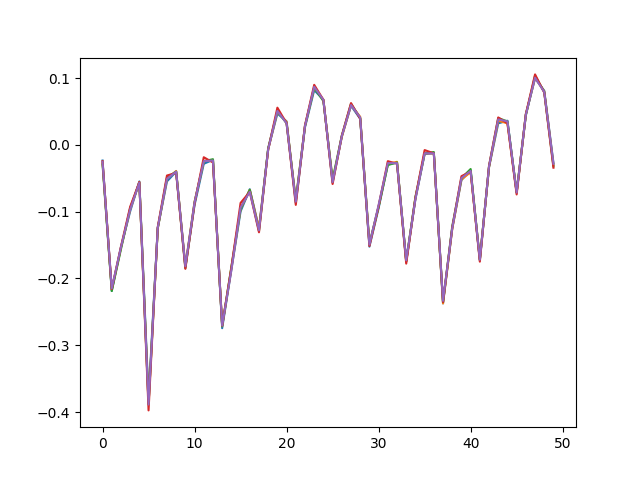

In [115]:
%matplotlib notebook

for d in data:
    plt.plot(d[2])

### Difference crypto done after 41 clock cycles

<IPython.core.display.Javascript object>


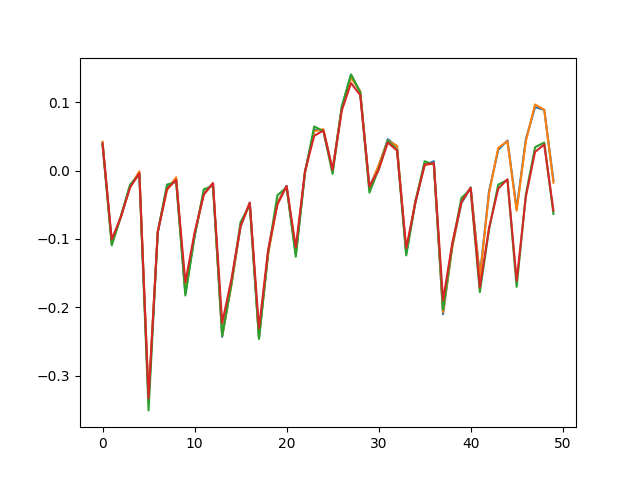

In [168]:
%matplotlib notebook

#trigger High+low
plt.plot(data[2]) 
plt.plot(data1[2])

##trigger low
plt.plot(data3[2])
plt.plot(data2[2])

### Tests

In [60]:
print(hexstr2int(data[0][1]))

[107, 148, 101, 37, 112, 224, 238, 29, 140, 28, 150, 123, 90, 160, 11, 27, 176, 11, 44, 155, 46, 85, 2, 85, 51, 175, 175, 245, 183, 174, 211, 54, 143, 98, 229, 134, 255, 142, 144, 139, 84, 158, 89, 146, 227, 78, 80, 67, 150, 149, 140, 232, 246, 255, 117, 121, 156, 2, 34, 12, 71, 72, 15, 178, 19, 69, 210, 39, 151, 42, 113, 167, 1, 20, 3, 19, 153, 208, 11, 42, 237, 218, 21, 8, 231, 158, 90, 32, 121, 81, 4, 175, 254, 49, 141, 12, 212, 98, 226, 5, 95, 222, 17, 130, 69, 95, 95, 29, 62, 180, 188, 166, 50, 43, 88, 4, 224, 18, 54, 93, 34, 235, 254, 162, 20, 37, 149, 123, 239, 170, 78, 136, 120, 60, 196, 48, 73, 138, 192, 183, 186, 223, 188, 2, 102, 75, 156, 136, 26, 101, 32, 73, 87, 209, 136, 59, 233, 35, 114, 16, 62, 137, 155, 243, 253, 139, 27, 202, 105, 16, 171, 163, 183, 48, 100, 135, 43, 220, 220, 228, 27, 109, 255, 135, 223, 238, 45, 74, 229, 163, 94, 216, 234, 114, 21, 119, 217, 245, 168, 147, 83, 89, 42, 41, 108, 78, 151, 44, 130, 38, 63, 213, 230, 229, 33, 250, 233, 145, 195, 155, 212

In [61]:
print(hexstr2int(get_sk()))

[236, 70, 23, 249, 128, 71, 17, 219, 205, 155, 33, 7, 201, 51, 12, 72, 199, 136, 238, 9, 36, 62, 25, 154, 143, 88, 8, 170, 82, 95, 114, 116, 204, 85, 180, 46, 244, 129, 111, 125, 34, 207, 5, 24, 97, 49, 84, 205, 226, 210, 155, 147, 131, 1, 69, 42, 53, 168, 169, 66, 147, 245, 117, 115, 36, 169, 228, 27, 189, 117, 43, 61, 40, 245, 154, 206, 116, 81, 108, 92, 39, 207, 176, 41, 49, 51, 123, 150, 136, 27, 75, 54, 181, 142, 58, 97, 88, 171, 161, 228, 149, 112, 88, 25, 43, 62, 72, 93, 78, 49, 112, 7, 69, 79, 63, 68, 84, 111, 48, 202, 148, 25, 24, 218, 244, 116, 1, 28, 84, 8, 243, 30, 12, 1, 122, 69, 171, 67, 85, 230, 80, 24, 84, 175, 149, 83, 114, 147, 139, 113, 226, 132, 19, 109, 163, 0, 75, 49, 184, 60, 96, 61, 14, 57, 151, 96, 148, 116, 25, 134, 8, 139, 248, 46, 29, 9, 182, 11, 252, 147, 188, 59, 161, 220, 124, 170, 16, 108, 12, 23, 37, 197, 83, 214, 92, 226, 161, 77, 93, 83, 187, 54, 214, 15, 157, 17, 183, 196, 154, 120, 91, 90, 89, 121, 3, 58, 228, 75, 16, 79, 209, 207, 175, 209, 193, 22

In [63]:
print(hexstr2int(data[0][0]))

[93, 97, 77, 141, 199, 218, 65, 226, 96, 100, 15, 192, 69, 221, 199, 51, 4, 217, 52, 91, 4, 12, 41, 111, 18, 51, 228, 158, 101, 64, 116, 163]
